# 📊 WanderWell Retreats – Smart Expansion Through Data-Driven Marketing

<!-- ------- -->

WanderWell Retreats is a modern travel startup known for its curated and personalized travel experiences. With a growing footprint in the premium travel sector, WanderWell currently offers five curated travel packages:

Explorer

Voyager

Elite Escape

Grand Odyssey

Majestic Luxe

<!-- -------------- -->

## 🧩 Problem Statement
WanderWell Retreats is facing low conversion rates (~12%) for its current travel packages due to non-targeted marketing strategies. With rising customer acquisition costs and minimal returns, the company is looking to improve its outreach by understanding customer preferences and predicting purchase behavior, especially as it prepares to launch a new Serenity Escape wellness package.

<!-- ---------- -->

## 🎯 Project Objective
The objective of this project is to leverage customer data to build a predictive and analytical framework that enables WanderWell Retreats to strategically launch its new Serenity Escape wellness travel package. By conducting comprehensive exploratory data analysis (EDA) and applying machine learning techniques, the aim is to understand customer behavior, identify high-conversion segments, and predict the likelihood of package purchase. This will help the company move away from random outreach and adopt a data-driven marketing approach, ultimately reducing acquisition costs, improving conversion rates, and guiding both marketing and policy teams with actionable insights for long-term strategic growth.

<!-- -------- -->

IMPORTING LIBRARIES

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  EXPLORATORY DATA ANALYSIS

In [143]:
df = pd.read_csv('Data/cleaned_Travel.csv')

df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalPersonVisting
0,1,41,Self Enquiry,3,6,Salaried,Female,3,Deluxe,3,Unmarried,1,1,2,1,Manager,20993,3
1,0,49,Company Invited,1,14,Salaried,Male,4,Deluxe,4,Divorced,2,0,3,1,Manager,20130,5
2,1,37,Self Enquiry,1,8,Free Lancer,Male,4,Basic,3,Unmarried,7,1,3,0,Executive,17090,3
3,0,33,Company Invited,1,9,Salaried,Female,3,Basic,3,Divorced,2,1,5,1,Executive,17909,3
4,0,36,Self Enquiry,1,8,Small Business,Male,3,Basic,4,Divorced,1,0,5,1,Executive,18468,2


CLASS IMBALANCE

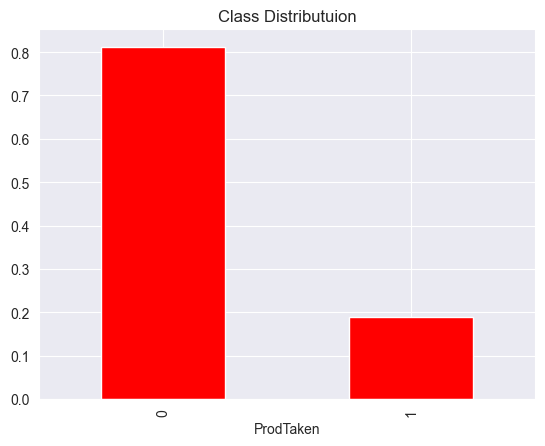

In [ ]:
sns.set_style('darkgrid')
df['ProdTaken'].value_counts(normalize = True).plot(kind = 'bar' , color = 'red')
plt.title('Class Distributuion')
plt.show()

In [145]:
class_percent = df['ProdTaken'].value_counts(normalize = True)*100

print('Percentage of Classes : ')

class_percent.round(4).astype(str) + '%'

Percentage of Classes : 


ProdTaken
0    81.1784%
1    18.8216%
Name: proportion, dtype: object

NOTE : CURRENTLY 18.8 % OF PEOPLE PURCHASED THE PACKAGE

In [146]:
num_cols = df.select_dtypes(include = 'int').columns


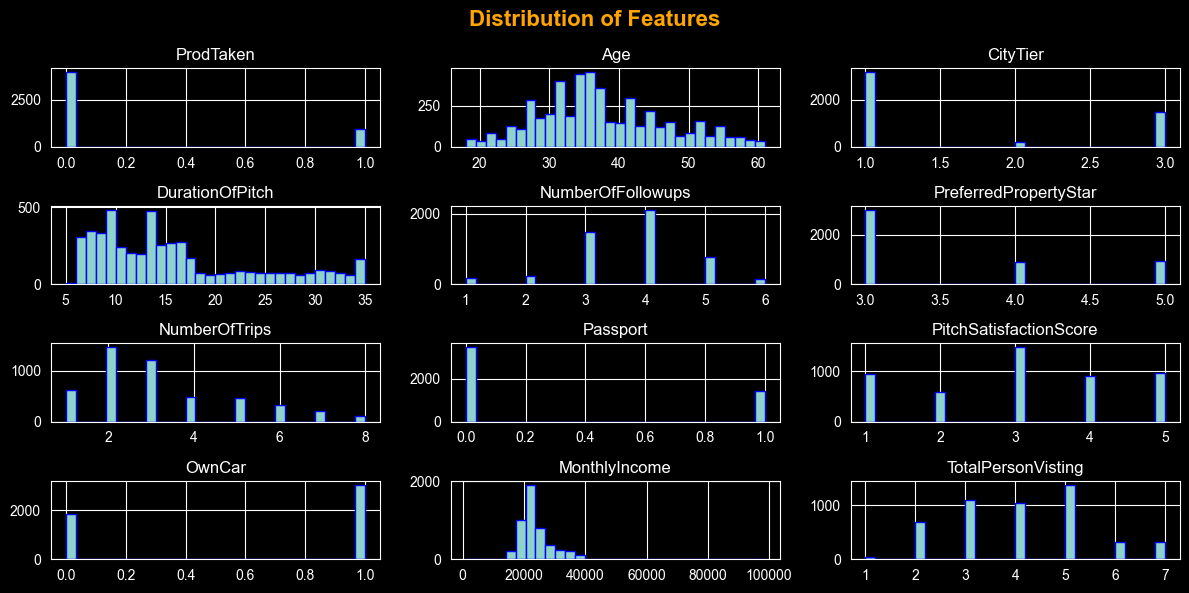

In [147]:
plt.style.use('dark_background')

df.hist(bins = 30, figsize=(12,6) ,edgecolor='blue')
plt.suptitle('Distribution of Features', fontsize=16, color='orange', fontweight='bold')

plt.tight_layout()
plt.show()

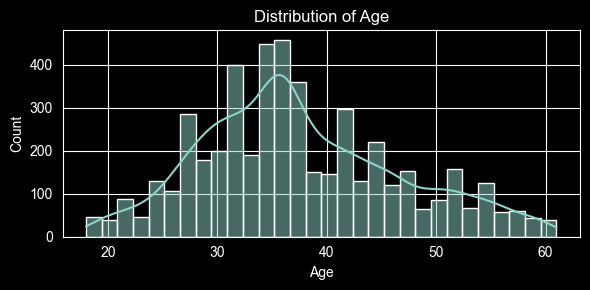

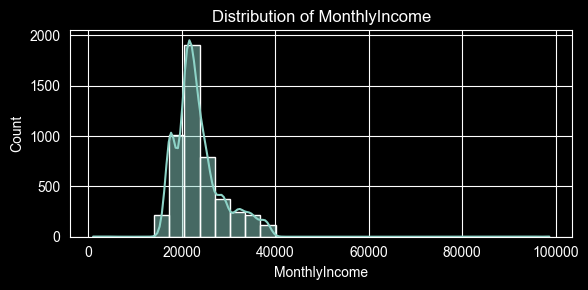

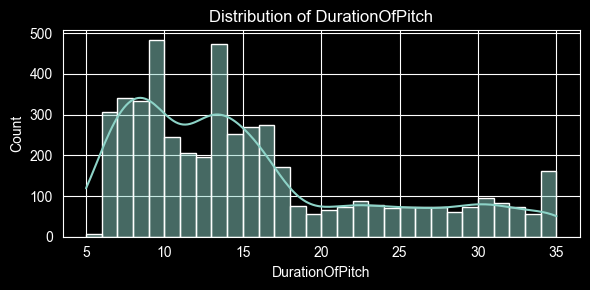

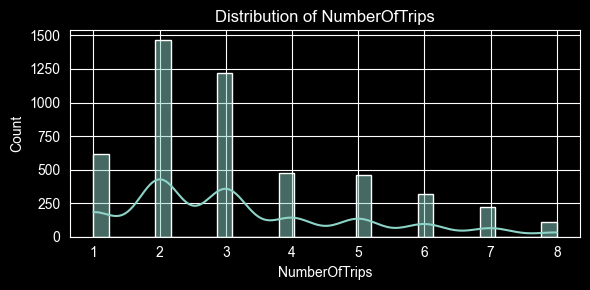

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Age', 'MonthlyIncome', 'DurationOfPitch', 'NumberOfTrips']

for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

INSIGHTS :

- PEOPLE EARNING IN RANGE 20K - 30K DOMINATE THE CUSTOMER BASE

- MOST PEOPLE ARE AGED 28 - 42

- USUALLY DURATION OF PITCH IS 8 - 15 MINS

- MOST PEOPLE TAKE 2 TRIPS



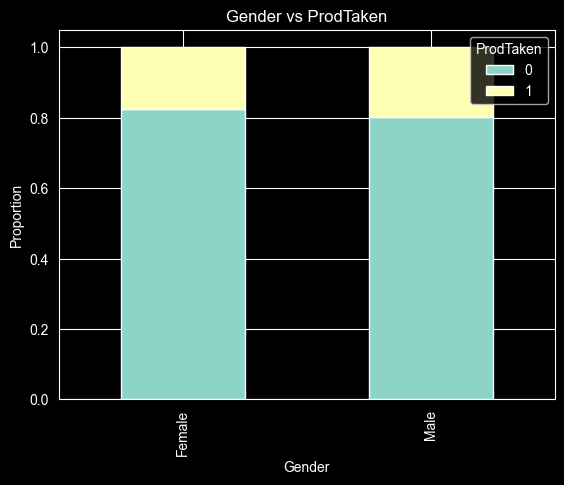

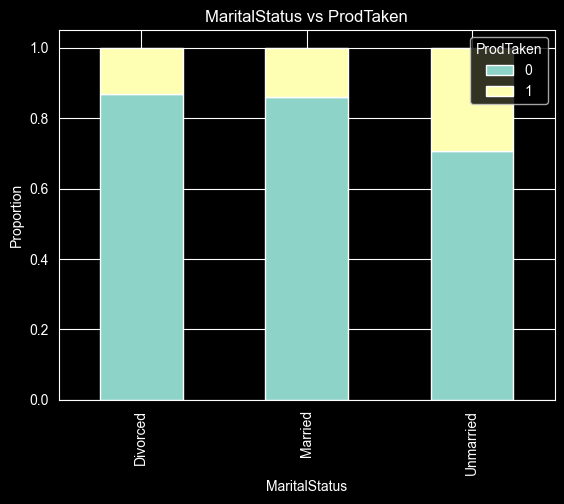

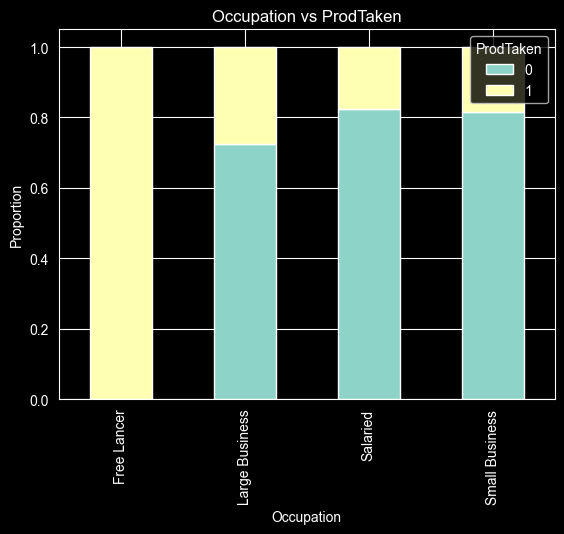

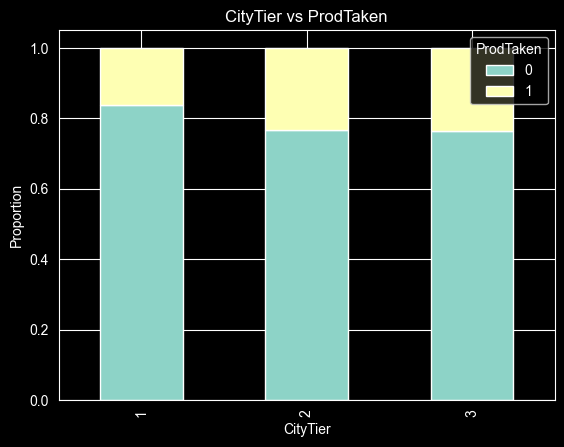

In [149]:
cat_cols = ['Gender', 'MaritalStatus', 'Occupation', 'CityTier']

for col in cat_cols:
    ct = pd.crosstab(df[col], df['ProdTaken'] , normalize= 'index')
    ct.plot(kind='bar', stacked=True)
    plt.legend(title='ProdTaken', loc='upper right')
    plt.title(f'{col} vs ProdTaken')
    plt.ylabel('Proportion')
    plt.show()


##  BUSINESS PROBLEMS

1. ) which age groups have the highest likelihood of purchasing the newly introduced travel package. This will help the marketing team target campaigns more efficiently and improve conversion rates.

SOLUTUION :

<Figure size 1200x600 with 0 Axes>

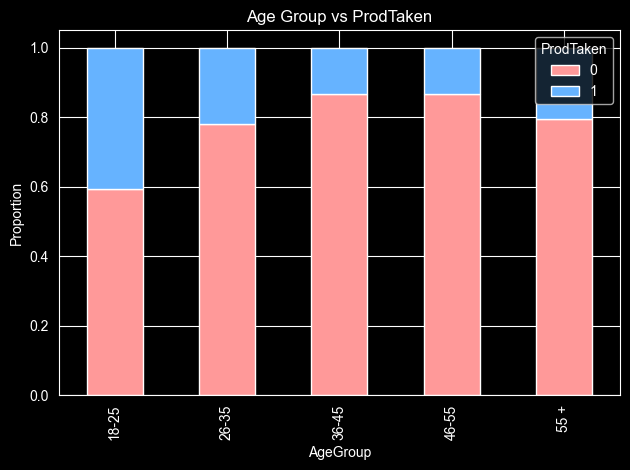

In [ ]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 25 , 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '55 +'])

age_ct = pd.crosstab(df['AgeGroup'], df['ProdTaken'], normalize='index')

plt.figure(figsize=(12, 6))
age_ct.plot(kind = 'bar' , stacked=True , color=['#FF9999', '#66B3FF'])
plt.title('Age Group vs ProdTaken')
plt.ylabel('Proportion')
plt.legend(title='ProdTaken', loc='upper right')
plt.tight_layout()
plt.show()



INFERNECE :

-->  CUSTOMER BASE HAVE AGE OF PEOPLE BETWEEN 18 TO 61

--> 18 - 25 AGE GROUP HAS HIGHEST CONVERSION RATE


<!-- ------------------------------------------------------------------------ -->

2. ) Identify which customer occupations have the highest likelihood of purchasing the travel package. This helps sales & marketing teams prioritize high-converting customer profiles.

SOLUTUON :

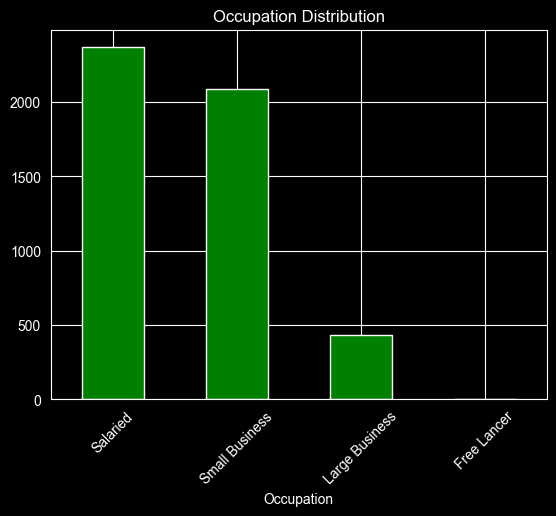

In [151]:
df['Occupation'].value_counts().plot(kind='bar', color='green')
plt.title('Occupation Distribution')
plt.xticks(rotation=45)
plt.show()

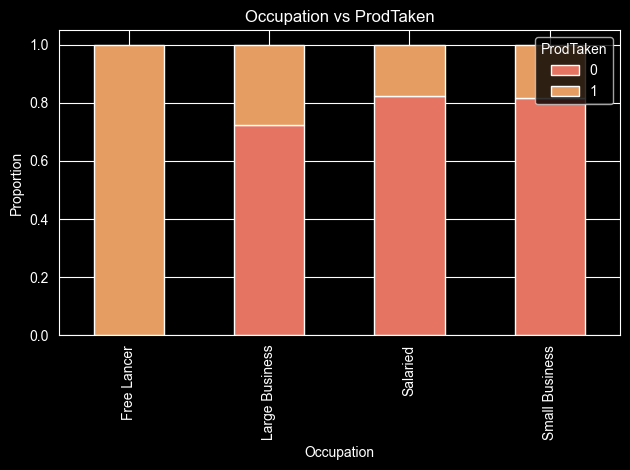

In [152]:
occupation_ct = pd.crosstab(df['Occupation'] , df['ProdTaken'] , normalize='index')


occupation_ct.plot(kind='bar', stacked=True, color=["#E67462", '#E69D62'])
plt.title('Occupation vs ProdTaken')
plt.ylabel('Proportion')
plt.legend(title='ProdTaken', loc='upper right')
plt.tight_layout()
plt.show()

INFERNECE : 

-->  THEIR ARE MOSTLY SALARIED CUSTOMERS IN THE CUSTOMER BASE

--> OUT OF ALL THE OCCUPATIONS , FREELANCERS HAVE THE HIGHEST CONVERSION RATE SIMPLY 

BECAUSE THEY ARE LESS IN NUMBER

--> THEREFORE THE CUSTOMERS WITH LARGE BUSINESSES HAVE THE HIGHEST CONVERSION RATE

<!-- ---------------------------------------------------------------------------------- -->

3. ) Understand how the number of follow-up interactions by salespersons affects the likelihood of a customer purchasing the product.

SOLUTUON :

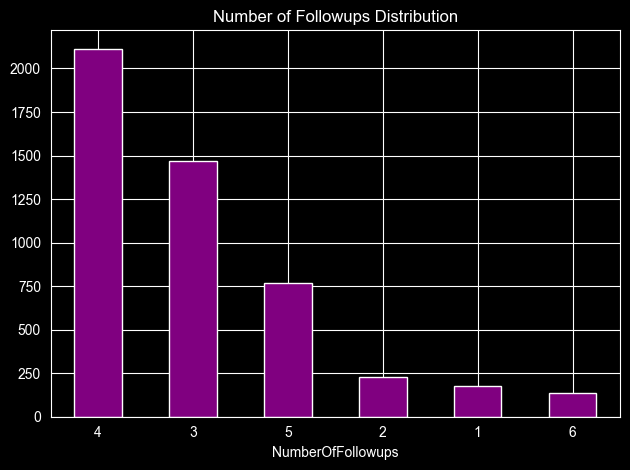

In [153]:
df['NumberOfFollowups'].value_counts().plot(kind='bar', color='purple')
plt.title('Number of Followups Distribution')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

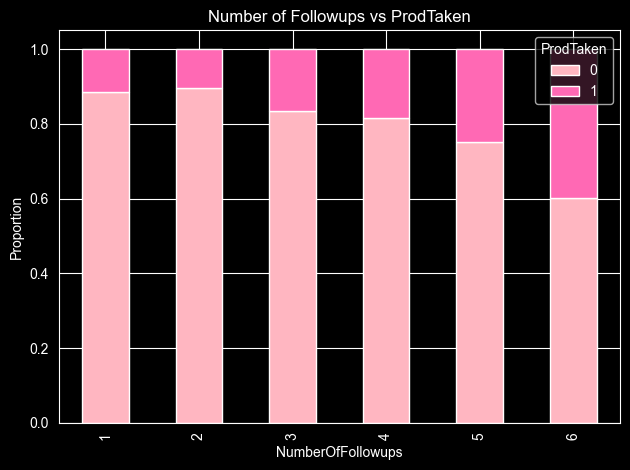

In [154]:
followups_ct = pd.crosstab(df['NumberOfFollowups'], df['ProdTaken'], normalize='index')

followups_ct.plot(kind='bar', stacked=True, color=["#FFB6C1", '#FF69B4'])
plt.title('Number of Followups vs ProdTaken')
plt.ylabel('Proportion')
plt.legend(title='ProdTaken', loc='upper right')
plt.tight_layout()
plt.show()

INFERENECE : 

--> MOSTLY 4 FOLLOW UPS ARE MADE , ON INCREASING THE NUMBER OF FOLLOWUPS , THE CONVERSION RATE INCREASES

--> 6 FOLLOWUPS SEEM TO BE THE OPTIMAL NUMBER THAT MAXIMIZES CONVERSION RATES

<!-- -------------------------------------------------------------------------------- -->

4. ) Check if married or single customers are more likely to purchase the travel package.

SOLUTION :

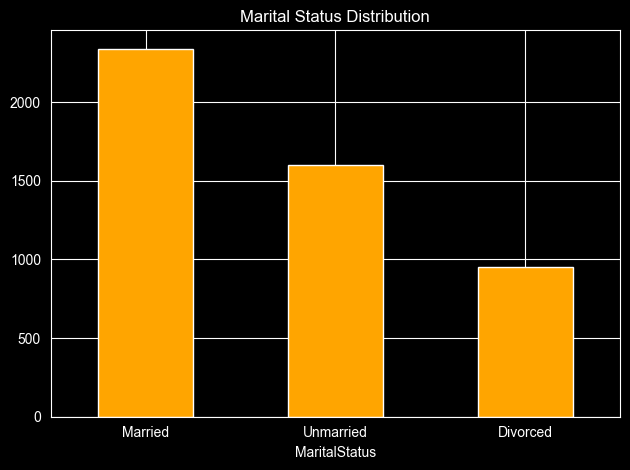

In [155]:
df['MaritalStatus'].value_counts().plot(kind='bar', color='orange')
plt.title('Marital Status Distribution')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

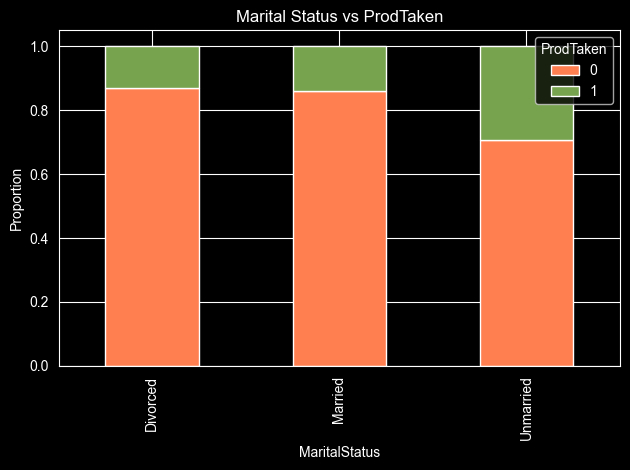

In [156]:
married_ct = pd.crosstab(df['MaritalStatus'] , df['ProdTaken'], normalize='index')

married_ct.plot(kind='bar', stacked=True, color=["#FF7F50", "#77A24E"])
plt.title('Marital Status vs ProdTaken')
plt.ylabel('Proportion')
plt.legend(title='ProdTaken', loc='upper right')
plt.tight_layout()
plt.show()

INFERNECE :

--> THERE ARE MOSTLY MARRIED PEOPLE IN THE CUSTOMER BASE

--> THE UNMARRIED CUSTOMERS SEEM TO HAVE THE HIGHEEST CONVERSION RATE

<!-- ----------------------------------------------------------------------- -->

5. )  Do More People in the Travel Group Increase Chances of Purchase?

SSOLUTION :

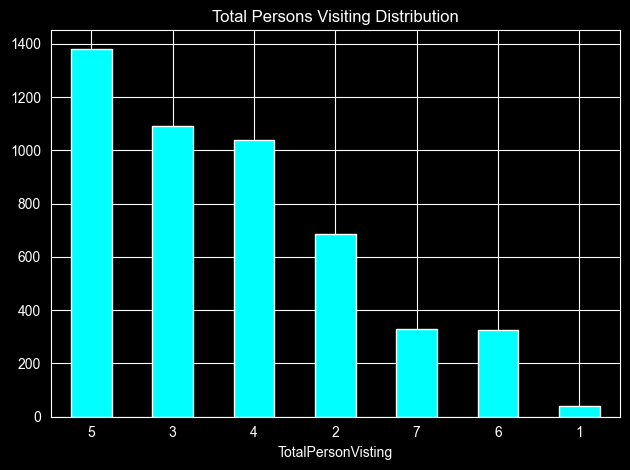

In [157]:
df['TotalPersonVisting'].value_counts().plot(kind='bar', color='cyan')
plt.title('Total Persons Visiting Distribution')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

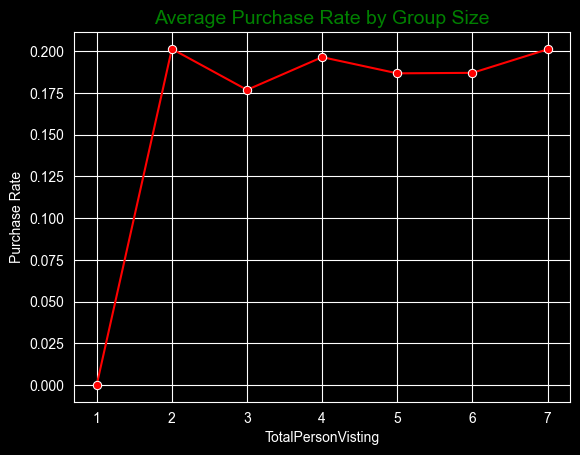

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

group_conv = df.groupby('TotalPersonVisting')['ProdTaken'].mean().reset_index()

sns.lineplot(data=group_conv, x='TotalPersonVisting', y='ProdTaken', marker='o' , color='red')
plt.title('Average Purchase Rate by Group Size' , color = 'green',  fontsize=14)
plt.ylabel('Purchase Rate')
plt.show()



INFERENCE :

--> PEOPLE MOSTLY VISIT IN A GROUP OF 5

--> CUSTOMERS TRAVELLING ALONE ALMOST NEVER BUY , WHILE THOSE IN GROUPS 2 - 7 HAVE
 CONSITENT CONVERSION RATES. MARKETING EFFORST SHOULD FOCUS ON GROUP TRAVELLERS ESPECIALLY
  COUPLES

<!-- ----------------------- -->

6. ) Does Customer Satisfaction with the Sales Pitch Score Affect Purchase?

SOLUTION :

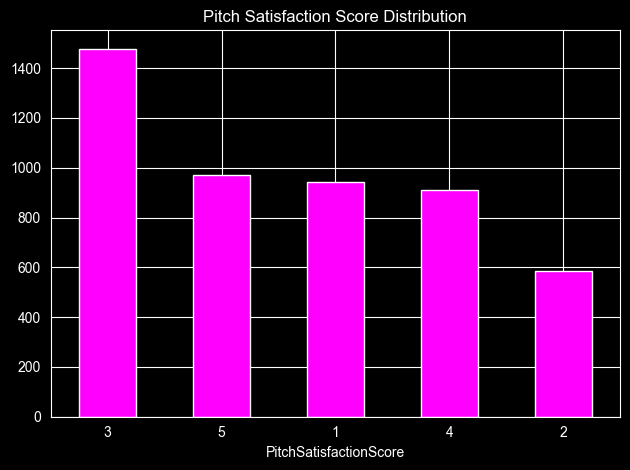

In [159]:
df['PitchSatisfactionScore'].value_counts().plot(kind='bar', color='magenta')
plt.title('Pitch Satisfaction Score Distribution')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

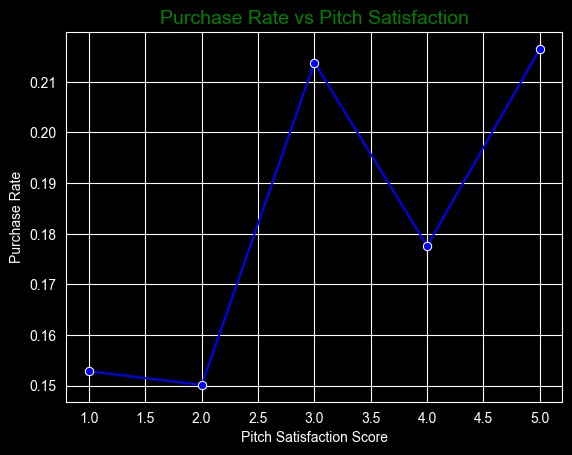

In [160]:
score_conv = df.groupby('PitchSatisfactionScore')['ProdTaken'].mean().reset_index()

sns.lineplot(data=score_conv, x='PitchSatisfactionScore', y='ProdTaken', marker='o' , color='blue' ) 
plt.title('Purchase Rate vs Pitch Satisfaction' , color = 'green', fontsize=14)
plt.ylabel('Purchase Rate')
plt.xlabel('Pitch Satisfaction Score')
plt.show()


INFERENCE :

--> MOST CUSTOMERS RATE THE PITCH SATISFACTION SCORE AS 3

--> THERE IS A HIGH CONVERSION RATE AMONG CUSTOMERS WHO RATE BETWEEN 3 TO 5

<!-- ------------------------------------------- -->

7. ) Explore if customers who own a car and have a passport are more likely to purchase — combining two lifestyle indicators.

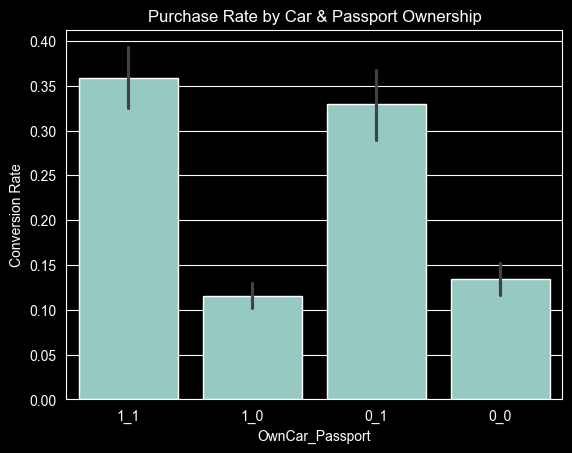

In [163]:
df1 = df.copy()

df1['carAndPassport'] = df1['OwnCar'].astype(str) + '_' + df1['Passport'].astype(str)

sns.barplot(x='carAndPassport', y='ProdTaken', data = df1 )
plt.title('Purchase Rate by Car & Passport Ownership')
plt.xlabel('OwnCar_Passport')
plt.ylabel('Conversion Rate')
plt.show()

INFERENCE :

--> PEOPLE WITH PASSPORT HAVE A HIGHER CONVERSION RATE

--> PEOPLE WITH BOTH CAR AND PASSPORT HAVE THE HIGHEST CONVERSION RATE

<!-- ------------------------------------------------------------------- -->

8. ) Analyze whether the preferred hotel star rating (1 to 5 stars) is a strong signal of purchasing intent.

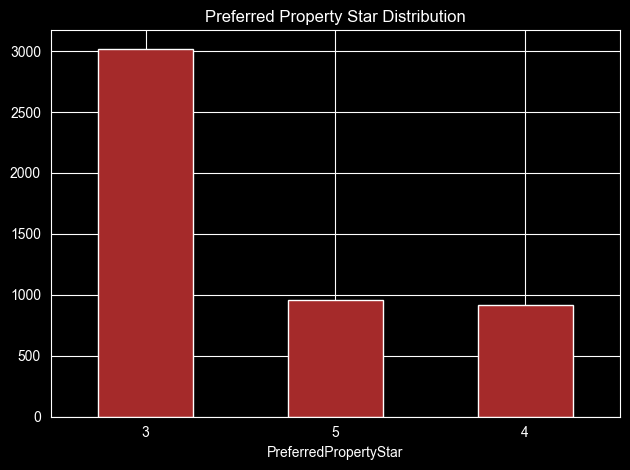

In [169]:
df['PreferredPropertyStar'].value_counts().plot(kind='bar', color = 'brown')
plt.title('Preferred Property Star Distribution')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

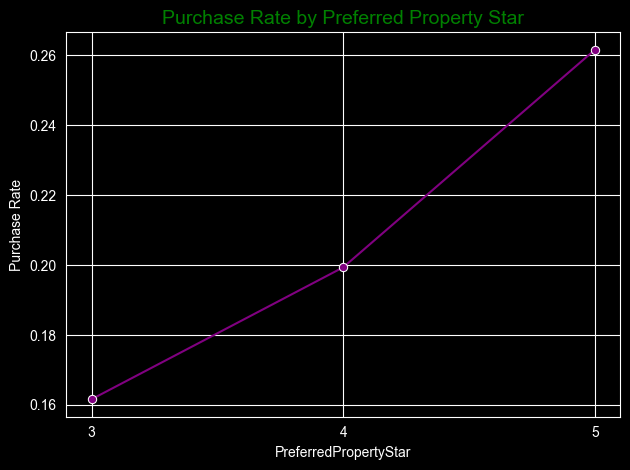

In [178]:
star_conv = df.groupby('PreferredPropertyStar')['ProdTaken'].mean().reset_index()

sns.lineplot(data = star_conv , x = 'PreferredPropertyStar' , y = 'ProdTaken', marker='o', color='purple')
plt.title('Purchase Rate by Preferred Property Star' , color = 'green', fontsize=14)
plt.ylabel('Purchase Rate')
plt.xticks([3, 4, 5])
plt.tight_layout()
plt.show()

INFERENCE :

--> THE PURCHASE RATE INCREASES WITH THE INCREASE IN PREFFERED PROPERTY STAR RATING

--> SHOULD TARGET LUXURY LOVING AUDIENCE


<!-- ---------------- -->

9. ) Identify which monthly income bracket shows the highest conversion rate to guide targeting and pricing strategy.

SOLUTION :

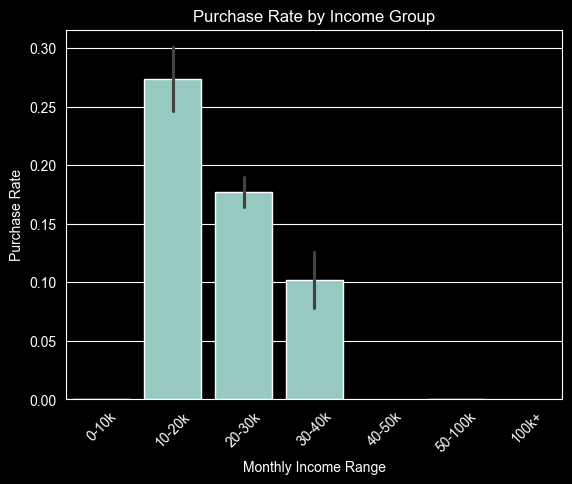

In [192]:
df1['IncomeGroup'] = pd.cut(
    df1['MonthlyIncome'],
    bins=[0, 10000, 20000, 30000, 40000, 50000, 100000, float('inf')],
    labels=['0-10k', '10-20k', '20-30k', '30-40k', '40-50k', '50-100k', '100k+']
)


sns.barplot(data=df1, x='IncomeGroup', y='ProdTaken')
plt.title('Purchase Rate by Income Group')
plt.ylabel('Purchase Rate')
plt.xlabel('Monthly Income Range')
plt.xticks(rotation=45)
plt.show()

INFERENCES :

--> PURCHASE RATE IS HIGHEST AMONG CUSTOMERS EARNING BETWEEN 10K - 30K BRACKET

<!-- --------------------- -->

10. ) Determine which feature significantly influences a customer’s likelihood to purchase the travel package, and how this insight can guide targeted marketing strategies.

SOLUTION

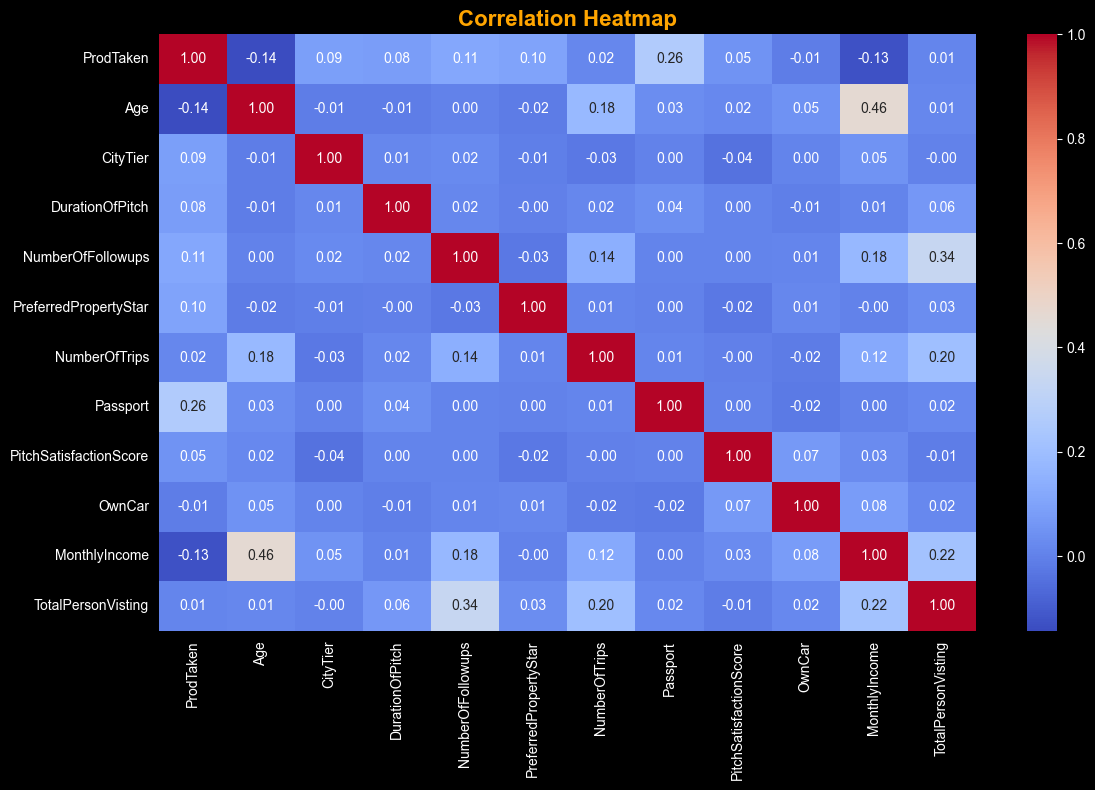

In [221]:
num_col = df.select_dtypes(include=['int64', 'float64'])

corr = num_col.corr()    
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=16, color='orange', fontweight='bold')
plt.tight_layout()
plt.show()

INFERENCES : 

--> STRONG POSITIVE CORRELATION BETWEEN PASSPORT AND PRODTAKEN

In [226]:
df.drop(columns=['AgeGroup'], inplace=True)